<a href="https://colab.research.google.com/github/JeroBernat/Actividad-3/blob/main/Actividad3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [328]:
#Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Sheet "2020"

In [329]:
#Cargamos el archivo csv en un dataframe
data2020 = pd.read_excel("Gastos y costos 20-23.xlsx",sheet_name="2020",skiprows=5)

#Visualización del frame
data2020.head()

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,GASTO,DESCRIPCION,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,TIPO,STATUS,POLIZA,Columna1
0,2020-01-01,39408,BD20F436-72CC-4BE2-AD37-5999D71AA391,ARE080115PBA,ARSI RENTA SA DE CV,MAQUINARIA,NaN,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00,I,Vigente,NaN,14051.72
1,2020-01-01,0001010100750847116902,85AEAC2E-6395-44A0-9CB9-754D06893375,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,NaN,COMISION COBRADA,1.0,490.00,78.40,0.0,0.0,568.40,568.40,I,Vigente,NaN,0.00
2,2020-01-01,0001010100752163714102,BD0DFE85-D776-41CB-9C5C-4FA7923E687A,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,NaN,COMISION COBRADA,1.0,195.00,31.20,0.0,0.0,226.20,226.20,I,Vigente,NaN,0.00
3,2020-01-01,3663,EF4504D6-830D-415C-AF03-80CF54C5E28E,PSS120625C86,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES,NaN,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33,I,Vigente,NaN,0.00
4,2020-01-01,2849,EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,ENA7006081P0,ELECTROTERMICA NACIONAL SA DE CV,COMPRAS,NaN,Pago,1.0,0.00,NaN,0.0,0.0,0.00,0.00,P,Vigente,NaN,0.00


In [330]:
#Información general del dataframe
data2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        3342 non-null   datetime64[ns]
 1   FOLIO        3153 non-null   object        
 2   UUID         3342 non-null   object        
 3   RFC          3342 non-null   object        
 4   PROVEEDOR    3342 non-null   object        
 5   TIPO GASTO   3342 non-null   object        
 6   GASTO        840 non-null    object        
 7   DESCRIPCION  3342 non-null   object        
 8   TC           2951 non-null   float64       
 9   IMPORTE      3308 non-null   float64       
 10  IVA          3074 non-null   float64       
 11  RET ISR      3342 non-null   float64       
 12  RET IVA      3342 non-null   float64       
 13  TOTAL MX     3342 non-null   float64       
 14  TOTAL SAT    3342 non-null   float64       
 15  TIPO         3341 non-null   object        
 16  STATUS

##Valores nulos

In [331]:
#Verificar que no contenga valores nulos
print(data2020.isnull().sum())

FECHA             0
FOLIO           189
UUID              0
RFC               0
PROVEEDOR         0
TIPO GASTO        0
GASTO          2502
DESCRIPCION       0
TC              391
IMPORTE          34
IVA             268
RET ISR           0
RET IVA           0
TOTAL MX          0
TOTAL SAT         0
TIPO              1
STATUS            0
POLIZA         3321
Columna1          0
dtype: int64


In [332]:
#Remplazar todos los valores nulos en el frame
data2020 = data2020.fillna(method="ffill")

#Comprobación
print(data2020.isnull().sum())

FECHA             0
FOLIO             0
UUID              0
RFC               0
PROVEEDOR         0
TIPO GASTO        0
GASTO          2493
DESCRIPCION       0
TC                0
IMPORTE           0
IVA               0
RET ISR           0
RET IVA           0
TOTAL MX          0
TOTAL SAT         0
TIPO              0
STATUS            0
POLIZA            7
Columna1          0
dtype: int64


In [333]:
#Para el análisis de outliers separaremos las columnas categóricas y numéricas
numericas2020 = data2020.drop(["FECHA","FOLIO","UUID","RFC","PROVEEDOR","TIPO GASTO","GASTO","DESCRIPCION","TIPO","STATUS","POLIZA"],axis=1)
categoricas2020 = data2020.loc[:,["FECHA","FOLIO","UUID","RFC","PROVEEDOR","TIPO GASTO","GASTO","DESCRIPCION","TIPO","STATUS","POLIZA"]]

#Información de ambos frames
print(numericas2020.info())
print(categoricas2020.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TC         3342 non-null   float64
 1   IMPORTE    3342 non-null   float64
 2   IVA        3342 non-null   float64
 3   RET ISR    3342 non-null   float64
 4   RET IVA    3342 non-null   float64
 5   TOTAL MX   3342 non-null   float64
 6   TOTAL SAT  3342 non-null   float64
 7   Columna1   3342 non-null   float64
dtypes: float64(8)
memory usage: 209.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        3342 non-null   datetime64[ns]
 1   FOLIO        3342 non-null   object        
 2   UUID         3342 non-null   object        
 3   RFC          3342 non-null   object        
 4   PROVEEDOR    3342 non-null   object      

##Outliers

<Figure size 1500x800 with 0 Axes>

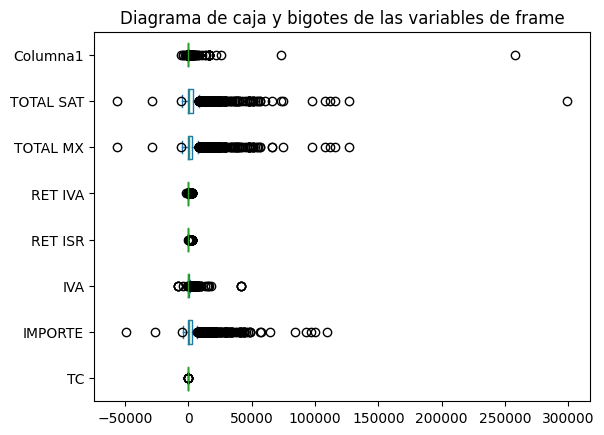

In [334]:
#Boxplot de las variables del frame para visuaizar los valores atípicos
fig = plt.figure(figsize=(15,8))
numericas2020.plot(kind="box",vert=False) #En vez de especificarle una columna el frmae le indicamos que todas la variables del frame
plt.title("Diagrama de caja y bigotes de las variables de frame")
plt.show()

##Método intercuartil

In [335]:
y = numericas2020 #No le especifico ninguna columna, unicamente ell dataframe entero

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3

iqr = percentile75 - percentile25 #50% de los datos

limite_superior_iqr = percentile75 + 1.5*iqr
limite_inferior_iqr = percentile25 - 1.5*iqr

#Límites superiores e inferiores de cada columna
print("Límite superior:")
print(round(limite_superior_iqr,1))
print()
print("Límite inferior:")
print(round(limite_inferior_iqr,1))

Límite superior:
TC              1.0
IMPORTE      7136.3
IVA          1104.2
RET ISR         0.0
RET IVA         0.0
TOTAL MX     7983.2
TOTAL SAT    8269.3
Columna1        0.0
dtype: float64

Límite inferior:
TC              1.0
IMPORTE     -4256.1
IVA          -649.0
RET ISR         0.0
RET IVA         0.0
TOTAL MX    -4783.1
TOTAL SAT   -4833.0
Columna1        0.0
dtype: float64


In [336]:
#Encontramos los outliers del dataframe
outliers = numericas2020[(numericas2020>limite_superior_iqr)|(numericas2020<limite_inferior_iqr)]
outliers

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,NaN,NaN,2248.28,NaN,NaN,NaN,16300.00,14051.72
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,10694.25,1711.08,NaN,NaN,12405.33,12405.33,NaN
4,NaN,NaN,1711.08,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [337]:
#Creamos un nuevo dataframe donde los outliers estén como datos nulos
data2020_2 = numericas2020[(numericas2020<=limite_superior_iqr)&(numericas2020>=limite_inferior_iqr)]
data2020_2

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,1.0,0.00,NaN,0.0,0.0,2248.28,NaN,NaN
1,1.0,490.00,78.40,0.0,0.0,568.40,568.40,0.0
2,1.0,195.00,31.20,0.0,0.0,226.20,226.20,0.0
3,1.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0
4,1.0,0.00,NaN,0.0,0.0,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...
3337,1.0,129.79,20.21,0.0,0.0,150.00,150.00,0.0
3338,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37,0.0
3339,1.0,163.79,26.21,0.0,0.0,190.00,190.00,0.0
3340,1.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0


In [338]:
#Contar outliers identificados
print(data2020_2.isnull().sum()) #Hay más outliers con este método porque loss límites son máss ajustados

TC             9
IMPORTE      417
IVA          424
RET ISR       45
RET IVA      253
TOTAL MX     420
TOTAL SAT    426
Columna1     240
dtype: int64


In [339]:
#Datos limpios
data2020_3 = data2020_2.copy()
data2020_3 = data2020_3.fillna(round(data2020_2.mean(),2))

#Comprobación de la eliminación de outlierss
print(data2020_3.isnull().sum())

TC           0
IMPORTE      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
Columna1     0
dtype: int64


In [340]:
#Unir las columnas con tipo de datos cualitativo
data2020_clean = pd.concat([categoricas,data2020_3],axis=1)
data2020_clean

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,MP,Descripción,Tipo,Status,Poliza,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,2022-01-01,280108,9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,PPD,AA RENTA EXIGIBLE CL0000006876 18/36 de 03/12/...,I,Vigente,PE02-ENE22,1.0,0.00,178.83,0.0,0.0,2248.28,1333.05,0.0
1,2022-01-01,280109,7E00E776-A839-4D57-B291-411109164B2F,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,PPD,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,I,Vigente,PE03-ENE22,1.0,490.00,78.40,0.0,0.0,568.40,568.40,0.0
2,2022-01-01,007817297284,BB6585C1-3B54-4130-AFD0-1867C3764821,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,PUE,Servicios de Facturación,I,Vigente,PE03-ENE22,1.0,195.00,31.20,0.0,0.0,226.20,226.20,0.0
3,2022-01-01,5595,B5E4B4EB-6C2F-11EC-BB9D-00155D014009,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,PUE,Pago,P,Vigente,PE03-ENE22,1.0,1119.71,178.83,0.0,0.0,1239.11,1333.05,0.0
4,2022-01-01,5614,BB6756D1-6CCD-11EC-947D-00155D014407,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,PUE,Pago,P,Vigente,PE03-ENE22,1.0,0.00,178.83,0.0,0.0,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,129.79,20.21,0.0,0.0,150.00,150.00,0.0
3338,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37,0.0
3339,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,163.79,26.21,0.0,0.0,190.00,190.00,0.0
3340,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0


In [341]:
#Convertir a csv el dataframe
data2020_clean.to_csv("Datos2020_limpios.csv")

#Descargar csv de salida
from google.colab import files

files.download("Datos2020_limpios.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Sheet "2021"

In [342]:
#Cargamos el archivo csv en un dataframe
data2021 = pd.read_excel("Gastos y costos 20-23.xlsx",sheet_name="2021",skiprows=3)

#Visualización del frame
data2021.head()

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,MP,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,TIPO,STATUS,POLIZA
0,2021-01-01,0001010100750847116902,71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,1.0,490.00,78.40,0.0,0.0,568.4,568.4,I,Vigente,0
1,2021-01-01,0001010100752163714102,B8AEDE83-CC76-404C-A611-6B5A87BA561F,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,1.0,345.00,55.20,0.0,0.0,400.2,400.2,I,Vigente,0
2,2021-01-01,19788,19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,ESI9612311E7,"ELECTRONICOS Y SIMILARES, S.A. DE C.V.",COMPRAS,MOTO E7 PLUS AZUL 64GB 4RAM,PUE,1.0,3447.41,551.59,0.0,0.0,3999.0,3999.0,I,Vigente,0
3,2021-01-01,211781,EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 6/36 de 03/12/2...,PPD,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6,I,Vigente,0
4,2021-01-01,211782,C16F79B5-FB35-4BFC-AF84-708B24F500BB,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 6/36 de 03/12/2...,PPD,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3,I,Vigente,0


In [343]:
#Información general del dataframe
data2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        3035 non-null   datetime64[ns]
 1   FOLIO        2888 non-null   object        
 2   UUID         3035 non-null   object        
 3   RFC          3035 non-null   object        
 4   PROVEEDOR    3035 non-null   object        
 5   TIPO GASTO   3035 non-null   object        
 6   DESCRIPCION  3035 non-null   object        
 7   MP           2381 non-null   object        
 8   TC           3035 non-null   float64       
 9   IMPORTE      3035 non-null   float64       
 10  IVA          3035 non-null   float64       
 11  RET ISR      3035 non-null   float64       
 12  RET IVA      3035 non-null   float64       
 13  TOTAL MX     3035 non-null   float64       
 14  TOTAL SAT    3035 non-null   float64       
 15  TIPO         3035 non-null   object        
 16  STATUS

##Valores Nulos

In [344]:
#Verificar que no contenga valores nulos
print(data2021.isnull().sum())

FECHA             0
FOLIO           147
UUID              0
RFC               0
PROVEEDOR         0
TIPO GASTO        0
DESCRIPCION       0
MP              654
TC                0
IMPORTE           0
IVA               0
RET ISR           0
RET IVA           0
TOTAL MX          0
TOTAL SAT         0
TIPO              0
STATUS            0
POLIZA         2372
dtype: int64


In [345]:
#Remplazar todos los valores nulos en los frames
data2021 = data2021.fillna(method="ffill")

#Comprobación
print(data2021.isnull().sum())

FECHA          0
FOLIO          0
UUID           0
RFC            0
PROVEEDOR      0
TIPO GASTO     0
DESCRIPCION    0
MP             0
TC             0
IMPORTE        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
TIPO           0
STATUS         0
POLIZA         0
dtype: int64


In [346]:
#Para el análisis de outliers separaremos las columnas categóricas y numéricas
numericas2021 = data2021.drop(["FECHA","FOLIO","UUID","RFC","PROVEEDOR","TIPO GASTO","MP","DESCRIPCION","TIPO","STATUS","POLIZA"],axis=1)
categoricas2021 = data2021.loc[:,["FECHA","FOLIO","UUID","RFC","PROVEEDOR","TIPO GASTO","MP","DESCRIPCION","TIPO","STATUS","POLIZA"]]

#Información de ambos frames
print(numericas2021.info())
print(categoricas2021.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TC         3035 non-null   float64
 1   IMPORTE    3035 non-null   float64
 2   IVA        3035 non-null   float64
 3   RET ISR    3035 non-null   float64
 4   RET IVA    3035 non-null   float64
 5   TOTAL MX   3035 non-null   float64
 6   TOTAL SAT  3035 non-null   float64
dtypes: float64(7)
memory usage: 166.1 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        3035 non-null   datetime64[ns]
 1   FOLIO        3035 non-null   object        
 2   UUID         3035 non-null   object        
 3   RFC          3035 non-null   object        
 4   PROVEEDOR    3035 non-null   object        
 5   TIPO GASTO   3035 non-null   obj

##Outliers

<Figure size 1500x800 with 0 Axes>

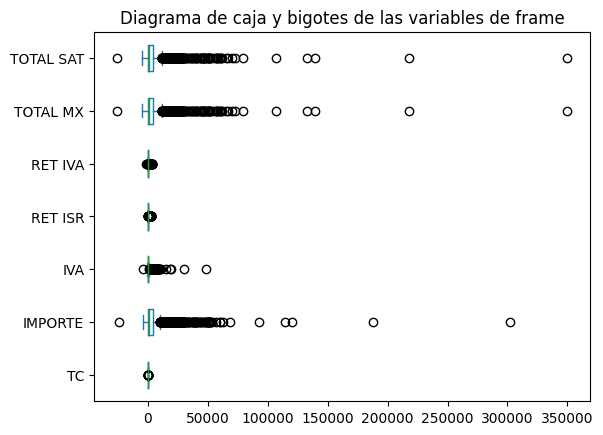

In [347]:
#Boxplot de las variables del frame para visuaizar los valores atípicos
fig = plt.figure(figsize=(15,8))
numericas2021.plot(kind="box",vert=False) #En vez de especificarle una columna el frmae le indicamos que todas la variables del frame
plt.title("Diagrama de caja y bigotes de las variables de frame")
plt.show()

##Método intercuartil

In [348]:
y = numericas2021 #No le especifico ninguna columna, unicamente el dataframe entero

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3

iqr = percentile75 - percentile25 #50% de los datos

limite_superior_iqr = percentile75 + 1.5*iqr
limite_inferior_iqr = percentile25 - 1.5*iqr

#Límites superiores e inferiores de cada columna
print("Límite superior:")
print(round(limite_superior_iqr,1))
print()
print("Límite inferior:")
print(round(limite_inferior_iqr,1))

Límite superior:
TC               1.0
IMPORTE      10127.7
IVA           1381.5
RET ISR          0.0
RET IVA          0.0
TOTAL MX     11580.3
TOTAL SAT    11456.0
dtype: float64

Límite inferior:
TC              1.0
IMPORTE     -6076.6
IVA          -828.9
RET ISR         0.0
RET IVA         0.0
TOTAL MX    -6948.2
TOTAL SAT   -6818.3
dtype: float64


In [349]:
#Encontramos los outliers del dataframe
outliers = numericas2021[(numericas2021>limite_superior_iqr)|(numericas2021<limite_inferior_iqr)]
outliers

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3030,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3031,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3032,NaN,22826.46,NaN,NaN,NaN,23532.04,23532.04
3033,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [350]:
#Creamos un nuevo dataframe donde los outliers estén como datos nulos
data2021_2 = numericas2021[(numericas2021<=limite_superior_iqr)&(numericas2021>=limite_inferior_iqr)]
data2021_2

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,490.00,78.40,0.0,0.0,568.4,568.4
1,1.0,345.00,55.20,0.0,0.0,400.2,400.2
2,1.0,3447.41,551.59,0.0,0.0,3999.0,3999.0
3,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6
4,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3
...,...,...,...,...,...,...,...
3030,1.0,0.00,0.00,0.0,0.0,0.0,0.0
3031,1.0,0.00,0.00,0.0,0.0,0.0,0.0
3032,1.0,NaN,705.58,0.0,0.0,NaN,NaN
3033,1.0,0.00,0.00,0.0,0.0,0.0,0.0


In [351]:
#Contar outliers identificados
print(data2021_2.isnull().sum()) #Hay más outliers con este método porque loss límites son máss ajustados

TC            24
IMPORTE      336
IVA          342
RET ISR       56
RET IVA      212
TOTAL MX     347
TOTAL SAT    351
dtype: int64


In [352]:
#Datos limpios
data2021_3 = data2021_2.copy()
data2021_3 = data2021_3.fillna(round(data2021_2.mean(),2))

#Comprobación de la eliminación de outlierss
print(data2021_3.isnull().sum())

TC           0
IMPORTE      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64


In [353]:
#Unir las columnas con tipo de datos cualitativo
data2021_clean = pd.concat([categoricas2021,data2021_3],axis=1)
data2021_clean

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,MP,DESCRIPCION,TIPO,STATUS,POLIZA,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,2021-01-01,0001010100750847116902,71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,PUE,COMISION COBRADA,I,Vigente,0,1.0,490.00,78.40,0.0,0.0,568.40,568.4
1,2021-01-01,0001010100752163714102,B8AEDE83-CC76-404C-A611-6B5A87BA561F,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,PUE,COMISION COBRADA,I,Vigente,0,1.0,345.00,55.20,0.0,0.0,400.20,400.2
2,2021-01-01,19788,19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,ESI9612311E7,"ELECTRONICOS Y SIMILARES, S.A. DE C.V.",COMPRAS,PUE,MOTO E7 PLUS AZUL 64GB 4RAM,I,Vigente,0,1.0,3447.41,551.59,0.0,0.0,3999.00,3999.0
3,2021-01-01,211781,EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,PPD,AA RENTA EXIGIBLE CL0000006876 6/36 de 03/12/2...,I,Vigente,0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.6
4,2021-01-01,211782,C16F79B5-FB35-4BFC-AF84-708B24F500BB,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,PPD,AA RENTA EXIGIBLE CL0000006877 6/36 de 03/12/2...,I,Vigente,0,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,2021-12-01,127043,83F82167-0D14-144E-9D76-045C95F25DDD,PGM881128QIA,"PROMOCIONES GRAFICAS MEXICANAS, S.A. DE C.V.",PUBLICIDAD,PPD,Pago,P,Vigente,PD02-DIC21,1.0,0.00,0.00,0.0,0.0,0.00,0.0
3031,2021-12-01,11740,B1C60AE0-02BC-4A33-9513-A280F72B5D06,SME0510105C7,SPECTRIS MEXICO S DE RL DE CV,COMPRAS,PUE,INSULATED T/C WIRE,I,Vigente,PD02-DIC21,1.0,0.00,0.00,0.0,0.0,0.00,0.0
3032,2021-12-01,1092957089,255F4A25-5753-4208-8F6B-0B59E5AE4741,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,PUE,SERVICIOS BANCARIOS,I,Vigente,PD02-DIC21,1.0,1699.53,705.58,0.0,0.0,1903.36,1910.9
3033,2021-12-01,747826,D8226E4F-9241-44C3-86A4-CDE9BC932528,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,PUE,COMISIONES E INTERESES,I,Vigente,PD02-DIC21,1.0,0.00,0.00,0.0,0.0,0.00,0.0


In [354]:
#Convertir a csv el dataframe
data2021_clean.to_csv("Datos2021_limpios.csv")

#Descargar csv de salida
from google.colab import files

files.download("Datos2021_limpios.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Sheet "2022"

In [355]:
#Cargamos el archivo csv en un dataframe
data2022 = pd.read_excel("Gastos y costos 20-23.xlsx",sheet_name="2022",skiprows=3)

#Visualización del frame
data2022.head()

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,2022-01-01,280108,9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 18/36 de 03/12/...,PPD,1.0,5551.38,888.22,0.0,0.0,NaN,6439.6,6439.6,I,Vigente,PE02-ENE22
1,2022-01-01,280109,7E00E776-A839-4D57-B291-411109164B2F,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,PPD,1.0,5551.98,888.32,0.0,0.0,NaN,6440.3,6440.3,I,Vigente,PE03-ENE22
2,2022-01-01,007817297284,BB6585C1-3B54-4130-AFD0-1867C3764821,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Servicios de Facturación,PUE,1.0,0.00,0.00,0.0,0.0,NaN,0.0,0.0,I,Vigente,NaN
3,2022-01-01,5595,B5E4B4EB-6C2F-11EC-BB9D-00155D014009,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.0,0.0,P,Vigente,NaN
4,2022-01-01,5614,BB6756D1-6CCD-11EC-947D-00155D014407,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.0,0.0,P,Vigente,NaN


In [356]:
#Información general del dataframe
data2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        2577 non-null   datetime64[ns]
 1   Folio        2475 non-null   object        
 2   UUID         2577 non-null   object        
 3   RFC          2577 non-null   object        
 4   Proveedor    2577 non-null   object        
 5   TIPO GASTO   2577 non-null   object        
 6   Descripción  2577 non-null   object        
 7   MP           2024 non-null   object        
 8   TC           1941 non-null   float64       
 9   Importe      2577 non-null   float64       
 10  IVA          2577 non-null   float64       
 11  RET ISR      2577 non-null   float64       
 12  RET IVA      2577 non-null   float64       
 13  Otros        0 non-null      float64       
 14  TOTAL MX     2577 non-null   float64       
 15  TOTAL SAT    2577 non-null   float64       
 16  Tipo  

##Valores nulos

In [357]:
#Verificar que no contenga valores nulos
print(data2022.isnull().sum())

Fecha             0
Folio           102
UUID              0
RFC               0
Proveedor         0
TIPO GASTO        0
Descripción       0
MP              553
TC              636
Importe           0
IVA               0
RET ISR           0
RET IVA           0
Otros          2577
TOTAL MX          0
TOTAL SAT         0
Tipo              0
Status            0
Poliza          801
dtype: int64


In [358]:
#Remplazar todos los valores nulos en los frames
data2022 = data2022.fillna(method="bfill")
data2022 = data2022.fillna(method="ffill")
#Comprobación
print(data2022.isnull().sum())

#La columna "otros" tiene valores nulos en todas las filas por lo que la eliminaremos
data2022.pop("Otros")

#Volvemos a comprobar
print(data2022.isnull().sum())

Fecha             0
Folio             0
UUID              0
RFC               0
Proveedor         0
TIPO GASTO        0
Descripción       0
MP                0
TC                0
Importe           0
IVA               0
RET ISR           0
RET IVA           0
Otros          2577
TOTAL MX          0
TOTAL SAT         0
Tipo              0
Status            0
Poliza            0
dtype: int64
Fecha          0
Folio          0
UUID           0
RFC            0
Proveedor      0
TIPO GASTO     0
Descripción    0
MP             0
TC             0
Importe        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
Tipo           0
Status         0
Poliza         0
dtype: int64


In [359]:
#Para el análisis de outliers separaremos las columnas categóricas y numéricas
numericas2022 = data2022.drop(["Fecha","Folio","UUID","RFC","Proveedor","TIPO GASTO","MP","Descripción","Tipo","Status","Poliza"],axis=1)
categoricas2022 = data2022.loc[:,["Fecha","Folio","UUID","RFC","Proveedor","TIPO GASTO","MP","Descripción","Tipo","Status","Poliza"]]

#Información de ambos frames
print(numericas2022.info())
print(categoricas2022.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TC         2577 non-null   float64
 1   Importe    2577 non-null   float64
 2   IVA        2577 non-null   float64
 3   RET ISR    2577 non-null   float64
 4   RET IVA    2577 non-null   float64
 5   TOTAL MX   2577 non-null   float64
 6   TOTAL SAT  2577 non-null   float64
dtypes: float64(7)
memory usage: 141.1 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        2577 non-null   datetime64[ns]
 1   Folio        2577 non-null   object        
 2   UUID         2577 non-null   object        
 3   RFC          2577 non-null   object        
 4   Proveedor    2577 non-null   object        
 5   TIPO GASTO   2577 non-null   obj

##Outliers

<Figure size 1500x800 with 0 Axes>

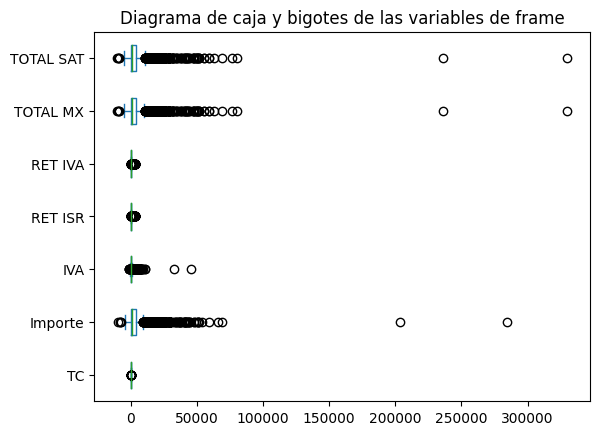

In [360]:
#Boxplot de las variables del frame para visuaizar los valores atípicos
fig = plt.figure(figsize=(15,8))
numericas2022.plot(kind="box",vert=False) #En vez de especificarle una columna el frmae le indicamos que todas la variables del frame
plt.title("Diagrama de caja y bigotes de las variables de frame")
plt.show()

##Método desviación estandar

In [361]:
#Desviación estandar
y = numericas2022

limite_superior = y.mean() + 3*y.std()
limite_inferior = y.mean() - 3*y.std()

print("Límites superior:")
print(round(limite_superior,1))
print()
print("Límites inferior:")
print(round(limite_inferior,1))
print()

Límites superior:
TC               6.2
Importe      34975.5
IVA           5048.6
RET ISR        977.6
RET IVA       1046.8
TOTAL MX     39054.1
TOTAL SAT    39095.5
dtype: float64

Límites inferior:
TC              -3.9
Importe     -26990.4
IVA          -4069.8
RET ISR       -902.6
RET IVA       -964.6
TOTAL MX    -30247.5
TOTAL SAT   -30173.0
dtype: float64



In [362]:
#Buscamos los outliers dentro del dataframe
outliers = numericas2022[(numericas2022>limite_superior)|(numericas2022<limite_inferior)]
outliers #Los inliers los coloca como datos nulos y les outliers si coloca su valor

,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2573,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2574,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2575,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [363]:
#Creamos un nuevo dataframe donde los outliers estén como datos nulos
data2022_2 = numericas2022[(numericas2022<=limite_superior)&(numericas2022>=limite_inferior)]
data2022_2 #Nuevo frame donde los outliers estan como valores nulos

,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
1,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
2,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3,1.0,0.00,0.00,0.0,0.0,0.00,0.00
4,1.0,0.00,0.00,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...
2572,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2573,1.0,17310.30,516.32,0.0,0.0,17826.62,17826.62
2574,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2575,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [364]:
#Contar outliers identificados
print(data2022_2.isnull().sum()) #Hay más outliers con este método porque loss límites son máss ajustados

TC           20
Importe      36
IVA          31
RET ISR      32
RET IVA      32
TOTAL MX     36
TOTAL SAT    36
dtype: int64


In [365]:
#Datos limpios
data2022_3 = data2022_2.copy()
data2022_3 = data2022_3.fillna(round(data2022_2.mean(),2))

#Comprobación de la eliminación de outlierss
print(data2022_3.isnull().sum())

TC           0
Importe      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64


In [366]:
#Unir las columnas con tipo de datos cualitativo
data2022_clean = pd.concat([categoricas2022,data2022_3],axis=1)
data2022_clean

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,MP,Descripción,Tipo,Status,Poliza,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,2022-01-01,280108,9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,PPD,AA RENTA EXIGIBLE CL0000006876 18/36 de 03/12/...,I,Vigente,PE02-ENE22,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
1,2022-01-01,280109,7E00E776-A839-4D57-B291-411109164B2F,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,PPD,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,I,Vigente,PE03-ENE22,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
2,2022-01-01,007817297284,BB6585C1-3B54-4130-AFD0-1867C3764821,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,PUE,Servicios de Facturación,I,Vigente,PE01-ENE22,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3,2022-01-01,5595,B5E4B4EB-6C2F-11EC-BB9D-00155D014009,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,PUE,Pago,P,Vigente,PE01-ENE22,1.0,0.00,0.00,0.0,0.0,0.00,0.00
4,2022-01-01,5614,BB6756D1-6CCD-11EC-947D-00155D014407,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,PUE,Pago,P,Vigente,PE01-ENE22,1.0,0.00,0.00,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,2022-12-01,863376,E90DA089-3C3B-45C8-A19C-B8810D222F60,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,PUE,COMISIONES E INTERESES,I,Vigente,PD02-DIC22/PE104-ENE23,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2573,2022-12-01,1092957089,D720ED7C-F370-4236-B269-8873ABB78745,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,PUE,SERVICIOS BANCARIOS,I,Vigente,PD02-DIC22/PE104-ENE23,1.0,17310.30,516.32,0.0,0.0,17826.62,17826.62
2574,2022-12-01,4,0AFD3EB5-F3DD-43EB-B9FA-79D793CFF417,AAE6411055P8,Aesa Articulos Electricos S.A de C.V,COMPRAS,PUE,Pago,P,Vigente,PD02-DIC22/PE104-ENE23,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2575,2022-12-01,16,E3CA1DA8-581A-5844-80D2-CF0317B3BBEA,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,PUE,Pago,P,Vigente,PD02-DIC22/PE104-ENE23,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [367]:
#Convertir a csv el dataframe
data2022_clean.to_csv("Datos2022_limpios.csv")

#Descargar csv de salida
from google.colab import files

files.download("Datos2022_limpios.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Sheet "2023"

In [368]:
#Cargamos el archivo csv en un dataframe
data2023 = pd.read_excel("Gastos y costos 20-23.xlsx",sheet_name="2023",skiprows=3)

#Visualización del frame
data2023.head()

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00,P,Vigente,NaN
1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00,P,Vigente,NaN
2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,PPD,99.0,1.0,5551.38,888.22,0.0,0.0,NaN,6439.60,6439.60,I,Vigente,PE01-ENE23
3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,PPD,99.0,1.0,5551.98,888.32,0.0,0.0,NaN,6440.30,6440.30,I,Vigente,PE02-ENE23
4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,PPD,99.0,1.0,8454.37,1352.70,0.0,0.0,NaN,9807.07,9807.07,I,Vigente,PE03-ENE23


In [369]:
#Información general del dataframe
data2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        397 non-null    datetime64[ns]
 1   Folio        384 non-null    object        
 2   UUID         397 non-null    object        
 3   RFC          397 non-null    object        
 4   Proveedor    397 non-null    object        
 5   TIPO GASTO   389 non-null    object        
 6   Descripción  397 non-null    object        
 7   MP           326 non-null    object        
 8   FP           326 non-null    float64       
 9   TC           397 non-null    float64       
 10  Importe      397 non-null    float64       
 11  IVA          397 non-null    float64       
 12  RET ISR      397 non-null    float64       
 13  RET IVA      397 non-null    float64       
 14  Otros        0 non-null      float64       
 15  TOTAL MX     397 non-null    float64       
 16  TOTAL SA

In [370]:
#Verificar que no contenga valores nulos
print(data2023.isnull().sum())

Fecha            0
Folio           13
UUID             0
RFC              0
Proveedor        0
TIPO GASTO       8
Descripción      0
MP              71
FP              71
TC               0
Importe          0
IVA              0
RET ISR          0
RET IVA          0
Otros          397
TOTAL MX         0
TOTAL SAT        0
Tipo             0
Status           0
Poliza         115
dtype: int64


In [371]:
#Remplazar todos los valores nulos en los frames con la moda de cada columna
data2023 = data2023.fillna(method = "bfill")
data2023 = data2023.fillna(method = "ffill")

#Comprobación
print(data2023.isnull().sum())

#La columna "otros" tiene valores nulos en todas las filas por lo que la eliminaremos
data2023.pop("Otros")

#Volvemos a comprobar
print(data2023.isnull().sum())

Fecha            0
Folio            0
UUID             0
RFC              0
Proveedor        0
TIPO GASTO       0
Descripción      0
MP               0
FP               0
TC               0
Importe          0
IVA              0
RET ISR          0
RET IVA          0
Otros          397
TOTAL MX         0
TOTAL SAT        0
Tipo             0
Status           0
Poliza           0
dtype: int64
Fecha          0
Folio          0
UUID           0
RFC            0
Proveedor      0
TIPO GASTO     0
Descripción    0
MP             0
FP             0
TC             0
Importe        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
Tipo           0
Status         0
Poliza         0
dtype: int64


In [372]:
#Para el análisis de outliers separaremos las columnas categóricas y numéricas
numericas2023 = data2023.drop(["Fecha","Folio","UUID","RFC","Proveedor","TIPO GASTO","MP","Descripción","Tipo","Status","Poliza"],axis=1)
categoricas2023 = data2023.loc[:,["Fecha","Folio","UUID","RFC","Proveedor","TIPO GASTO","MP","Descripción","Tipo","Status","Poliza"]]

#Información de ambos frames
print(numericas2023.info())
print(categoricas2023.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FP         397 non-null    float64
 1   TC         397 non-null    float64
 2   Importe    397 non-null    float64
 3   IVA        397 non-null    float64
 4   RET ISR    397 non-null    float64
 5   RET IVA    397 non-null    float64
 6   TOTAL MX   397 non-null    float64
 7   TOTAL SAT  397 non-null    float64
dtypes: float64(8)
memory usage: 24.9 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        397 non-null    datetime64[ns]
 1   Folio        397 non-null    object        
 2   UUID         397 non-null    object        
 3   RFC          397 non-null    object        
 4   Proveedor    397 non-null    object        
 5

##Outliers

<Figure size 1500x800 with 0 Axes>

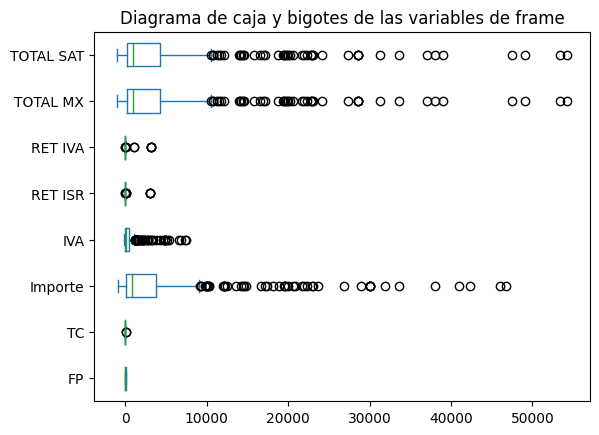

In [373]:
#Boxplot de las variables del frame para visuaizar los valores atípicos
fig = plt.figure(figsize=(15,8))
numericas2023.plot(kind="box",vert=False) #En vez de especificarle una columna el frmae le indicamos que todas la variables del frame
plt.title("Diagrama de caja y bigotes de las variables de frame")
plt.show()

##Método desviación estandar

In [374]:
#Desviación estandar
y = numericas2023

limite_superior = y.mean() + 3*y.std()
limite_inferior = y.mean() - 3*y.std()

print("Límites superior:")
print(round(limite_superior,1))
print()
print("Límites inferior:")
print(round(limite_inferior,1))
print()

Límites superior:
FP             186.7
TC               5.0
Importe      26557.2
IVA           3761.8
RET ISR        931.2
RET IVA       1022.5
TOTAL MX     29218.5
TOTAL SAT    29218.5
dtype: float64

Límites inferior:
FP             -99.0
TC              -2.8
Importe     -18708.4
IVA          -2767.0
RET ISR       -869.1
RET IVA       -947.1
TOTAL MX    -20512.1
TOTAL SAT   -20512.1
dtype: float64



In [375]:
#Buscamos los outliers dentro del dataframe
outliers = numericas2023[(numericas2023>limite_superior)|(numericas2023<limite_inferior)]
outliers #Los inliers los coloca como datos nulos y les outliers si coloca su valor

,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [376]:
#Creamos un nuevo dataframe donde los outliers estén como datos nulos
data2023_2 = numericas2023[(numericas2023<=limite_superior)&(numericas2023>=limite_inferior)]
data2023_2 #Nuevo frame donde los outliers estan como valores nulos

,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,99.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
1,99.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2,99.0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
3,99.0,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
4,99.0,1.0,8454.37,1352.70,0.0,0.0,9807.07,9807.07
...,...,...,...,...,...,...,...,...
392,3.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
393,1.0,1.0,220.00,0.00,0.0,0.0,220.00,220.00
394,3.0,1.0,18071.52,682.40,0.0,0.0,18753.92,18753.92
395,5.0,1.0,14472.32,0.00,0.0,0.0,14472.32,14472.32


In [377]:
#Contar outliers identificados
print(data2023_2.isnull().sum()) #Hay más outliers con este método porque loss límites son máss ajustados

FP            0
TC            2
Importe      13
IVA          13
RET ISR       4
RET IVA       6
TOTAL MX      9
TOTAL SAT     9
dtype: int64


In [378]:
#Datos limpios
data2023_3 = data2023_2.copy()
data2023_3 = data2023_3.fillna(round(data2023_2.mean(),2))

#Comprobación de la eliminación de outlierss
print(data2023_3.isnull().sum())

FP           0
TC           0
Importe      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64


In [379]:
#Unir las columnas con tipo de datos cualitativo
data2023_clean = pd.concat([categoricas2023,data2023_3],axis=1)
data2023_clean

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,MP,Descripción,Tipo,Status,Poliza,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,PPD,Pago,P,Vigente,PE01-ENE23,99.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,PPD,Pago,P,Vigente,PE01-ENE23,99.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,PPD,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,I,Vigente,PE01-ENE23,99.0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,PPD,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,I,Vigente,PE02-ENE23,99.0,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,PPD,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,I,Vigente,PE03-ENE23,99.0,1.0,8454.37,1352.70,0.0,0.0,9807.07,9807.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,2023-02-01,882974,3E97C399-6747-4BCA-8436-ED4B0933DF33,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,PUE,COMISIONES E INTERESES,I,Vigente,PE111-FEB23,3.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
393,2023-02-01,053560,B7132758-F800-4797-B1D6-CC61AFFEE444,BPU7901018D4,BEBIDAS PURIFICADAS,ALIMENTOS,PUE,Epura 20 Lts Policarbonato,I,Vigente,PE111-FEB23,1.0,1.0,220.00,0.00,0.0,0.0,220.00,220.00
394,2023-02-01,1092957089,D1E2DC1E-9FFB-46C6-82E4-B350B83CB6F7,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,PUE,SERVICIOS BANCARIOS,I,Vigente,PE111-FEB23,3.0,1.0,18071.52,682.40,0.0,0.0,18753.92,18753.92
395,2023-02-01,1453820,6249FE27-6FA6-4EFB-910E-3CD67A0E29A1,EFE8908015L3,EFECTIVALE S. de R.L. de C.V.,GASOLINA,PUE,CONSUMOS DE COMBUSTIBLE DE MONEDEROS ELECTRONICOS,I,Vigente,PE111-FEB23,5.0,1.0,14472.32,0.00,0.0,0.0,14472.32,14472.32


In [380]:
#Convertir a csv el dataframe
data2023_clean.to_csv("Datos2023_limpios.csv")

#Descargar csv de salida
from google.colab import files

files.download("Datos2023_limpios.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>